<a href="https://colab.research.google.com/github/zackoflonely/DatMin_PA/blob/main/PA_DATA_MIINING_KEL_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pengolahan Data Menggunakan Metode Supervised Learning pada Data Pinjaman Nasabah**

# A2 Kelompok 3
Nama Anggota:


1.   Zaki Fauzan Rabbani
2.   Ferryza Nurwahyu
3.   Andi Abdurrahman







## Bussiness Understanding

Data pinjaman nasabah merupakan kumpulan data yang berisi tentang informasi pinjaman nasabah pada sebuah lembaga keuangan. Informasi yang diberikan sangat membantu lembaga keuangan dalam proses pengambilan keputusan terkait seberapa besar seorang nasabah dapat melakukan peminjaman, jangka waktu peminjaman, suku bungan, dan kemungkinan resiko yang akan terjadi.

dalam proses analisis, data pinjaman nasabah dibutuhkan untuk melakukan evaluasi resiko kredit dari calon nasabah, hal tersebut dapat dilakukan dengan melakukan analisis pada pendapatan, pekerjaan, jumlah tanggungan, dan sebagainya. setelah proses analisis selesai, pihak lembaga keuangan dapat mengambil keputusan apakah seorang calon nasabah tersebut layak diberi pinjaman atau tidak.

selain itu, data pinjaman nasabah dapat membantu lembaga keuangan dalam mengembangkan strategi bisnis seperti menentukan target pasar, penyesuaian produk, efisiensi kredit, dan lain sebagainya.

### Bussiness Objectives

*   pengambil keputusan untuk menilai risiko kredit dan kecenderungan nasabah dalam melakukan pembayaran. Hal ini dapat membantu perusahaan keuangan dalam membuat keputusan yang lebih baik dalam memberikan pinjaman atau kredit kepada nasabah.


*   Penghematan biaya: Dengan menggunakan dataset pinjaman-nasabah, perusahaan keuangan dapat memperkirakan risiko kredit dengan lebih akurat, sehingga dapat mengurangi jumlah pinjaman bermasalah atau yang tidak dapat dipulihkan. Hal ini dapat membantu perusahaan keuangan menghemat biaya dalam menangani pinjaman bermasalah atau pembayaran yang tidak terbayarkan.
*   Peningkatan efisiensi: Dataset pinjaman-nasabah dapat digunakan untuk mengidentifikasi kecenderungan nasabah dalam melakukan pembayaran, sehingga perusahaan keuangan dapat mengembangkan strategi untuk meningkatkan efisiensi dalam mengumpulkan pembayaran. Hal ini dapat membantu perusahaan keuangan meningkatkan efisiensi dan mengurangi biaya dalam proses pengumpulan pembayaran.



### Assess Situations

*   Kualitas data dalam dataset ini terbilang masih cukup kompleks dan memiliki beberapa poin yang harus diperbaiki
*   Memiliki berbagai tipe data

Adapun tools yang digunakan dalam analisis ini :

*   KNN
*   Naive Bayes
*   C4.5






### Datamining Goals

*   Memprediksi calon penerima pinjaman
*   Menemukan pola pemberian pinjaman
*   Menemukan klasifikasi dalam data



### Tujuan Analisis Dataset
Tujuan dari menganalisis dataset ini untuk mencari kategori yang bagaimana yang dapat diberikan pinjaman. Dari dataset diatas, dilakukan pengolahan data untuk memprediksi kategori yang dapat melakukan pinjaman, seperti
 apakah nantinya kategori yang incomenya kecil dengan jumlah tanggungan besar atau lainnya.

## Data Understanding

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/zackoflonely/028_Zaki-Fauzan_PO2_DatMin/main/dataset-pinjaman-nasabah.csv')

### Describe Data
Berikut merupakan isi keseluruhan dataset:

In [ ]:
df

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


In [ ]:
print("Berikut daftar kolom yang ada pada dataframe :")
for col in df.columns:
  print(col)

Berikut daftar kolom yang ada pada dataframe :
ID_Nasabah
JenisKelamin
StatusPernikahan
JumTanggungan
Pendidikan
Wiraswasta
IncomeNasabah
IncomePasangan
JumlahPinjaman
JangkaWaktuPinjaman
Credit_History
WilayahTempatTinggal
StatusPinjaman


### Penjelasan Kolom
ID Nasabah = Merupakan ID pengenal dan pembeda dari setiap nasabah yang pernah melakukan pinjaman. 

Jenis Kelamin = Merupakan kolom yang membedakan jenis kelamin setiap nasabah.

Status Pernikahan = Merupakan Kolom yang berisi status apakah menikah atau tidak.

JumTanggungan = Merupakan kolom yang berisi jumlah tanggungan yang dimiliki setiap nasabah.

Pendidikan = Merupakan kolom yang berisi tentang status pendidikan mereka apakah lulusan kuliah atau tidak.

Wiraswasta = Merupakan kolom yang berisi tentang status nasabah apakah seorang wiraswasta atau tidak.

IncomeNasabah = Merupakan kolom yang berisi pemasukan atau income setiap nasabah.

JumlahPinjaman = Kolom yang menampilkan besar pinjaman yang dimiliki.

JangkaWaktuPinjaman = Merupakan jangka waktu pinjaman tersebut diberikan.
-
Credit_History = Merupakan kolom yang menampilkan riwayat kredit yang dilakukan oleh nasabah.

WilayahTempatTinggal = Merupakan kolom dari data alamat yang ditampung dari nasabah

StatusPinjaman = Merupakan kolom yang menampilkan apakah nasabah masih dalam pinjaman atau tidak.

In [ ]:
import statistics
print("\nKolom            : JumTanggungan")
print("Mean             : ",df["JumTanggungan"].mean())
print("Min              : ", df["JumTanggungan"].min())
print("Max              : ", df["JumTanggungan"].max())
# print("Standar Deviasi  : ",statistics.stdev(df["JumTanggungan"]))

print("\nKolom            : IncomeNasabah")
print("Mean             : ",df["IncomeNasabah"].mean())
print("Min              : ", df["IncomeNasabah"].min())
print("Max              : ", df["IncomeNasabah"].max())
print("Standar Deviasi  : ",statistics.stdev(df["IncomeNasabah"]))

print("\nKolom            : IncomePasangan")
print("Mean             : ",df["IncomePasangan"].mean())
print("Min              : ", df["IncomePasangan"].min())
print("Max              : ", df["IncomePasangan"].max())
print("Standar Deviasi  : ",statistics.stdev(df["IncomePasangan"]))

print("\nKolom            : JumlahPinjaman")
print("Mean             : ",df["JumlahPinjaman"].mean())
print("Min              : ", df["JumlahPinjaman"].min())
print("Max              : ", df["JumlahPinjaman"].max())
# print("Standar Deviasi  : ",statistics.stdev(df["JumlahPinjaman"]))

print("\nKolom            : JangkaWaktuPinjaman")
print("Mean             : ",df["JangkaWaktuPinjaman"].mean())
print("Min              : ", df["JangkaWaktuPinjaman"].min())
print("Max              : ", df["JangkaWaktuPinjaman"].max())
# print("Standar Deviasi  : ",statistics.stdev(df["JangkaWaktuPinjaman"]))


Kolom            : JumTanggungan
Mean             :  0.7629382303839732
Min              :  0.0
Max              :  3.0

Kolom            : IncomeNasabah
Mean             :  5403.459283387622
Min              :  150
Max              :  81000
Standar Deviasi  :  6109.041673387178

Kolom            : IncomePasangan
Mean             :  1621.2459283387623
Min              :  0
Max              :  41667
Standar Deviasi  :  2926.2484057650972

Kolom            : JumlahPinjaman
Mean             :  146.41216216216216
Min              :  9.0
Max              :  700.0

Kolom            : JangkaWaktuPinjaman
Mean             :  342.0
Min              :  12.0
Max              :  480.0


### Explore Data

<Axes: xlabel='Pendidikan', ylabel='count'>

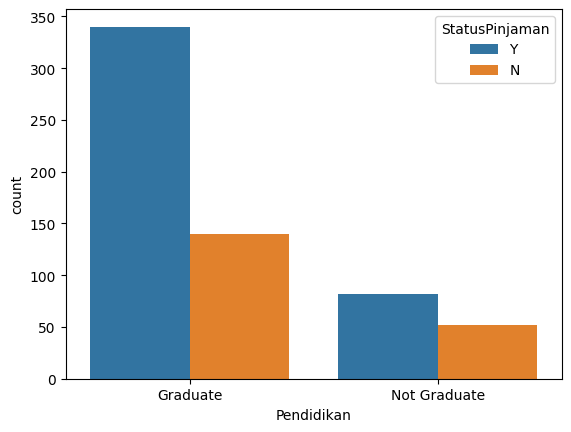

In [ ]:
import seaborn as sns
sns.countplot(data=df,x="Pendidikan",hue="StatusPinjaman")

Dari visualisasi diatas menunjukkan bahwa sebagian besar nasabah peminjam adalah mereka yang memiliki status graduate dengan perbandingan yang cukup jauh dan dapat dilihat pada visualisasi diatas

<Axes: xlabel='IncomeNasabah', ylabel='Count'>

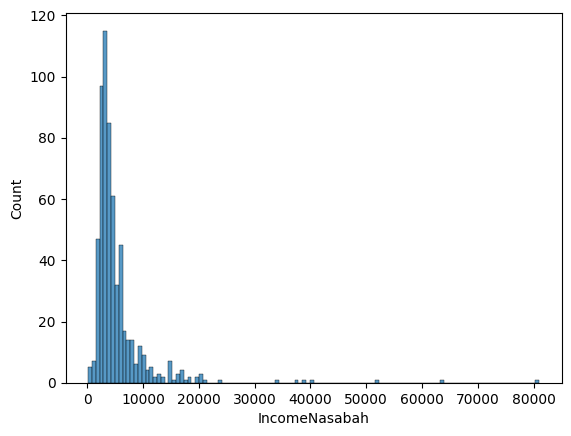

In [ ]:
sns.histplot(x='IncomeNasabah', data=df)

Visualisasi data diatas menunjukkan data income nasabah yang menjadi peminjam pada dataset ini memiliki berbagai macam income, namun sebagian besar income nasabah berada pada range 0-10000.

<Axes: xlabel='JumlahPinjaman', ylabel='JenisKelamin'>

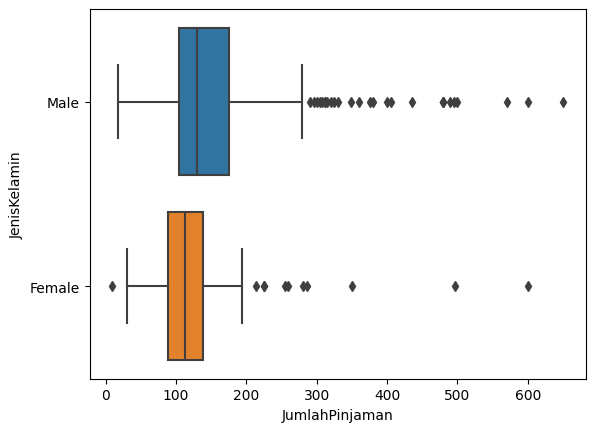

In [ ]:
sns.boxplot(x='JumlahPinjaman', y='JenisKelamin', data=df)

Pada visualisasi diatas menunjukkan nasabah dengan jenis kelamin laki-laki jauh lebih banyak dalam melakukan peminjaman dibanding perempuan. Selain itu jumlah peminjaman yang dipinjam juga lebih besar dibanding perempuan.

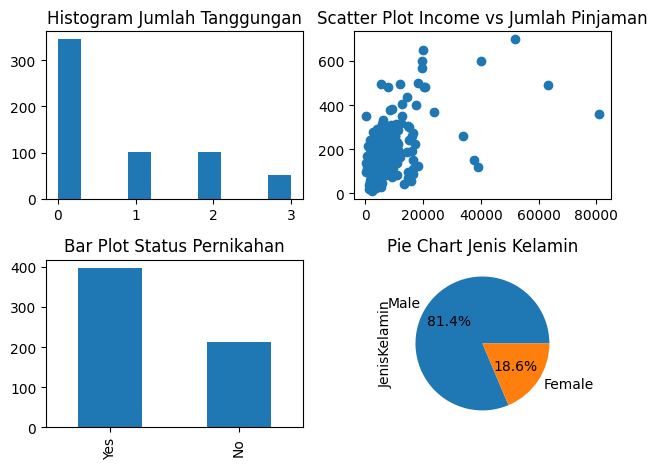

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# membaca dataset dalam format CSV
data = df

# membuat histogram dari kolom 'JumTanggungan'
plt.subplot(2, 2, 1)
plt.hist(data['JumTanggungan'])
plt.title('Histogram Jumlah Tanggungan')

# membuat scatter plot dari kolom 'IncomeNasabah' dan 'JumlahPinjaman'
plt.subplot(2, 2, 2)
plt.scatter(data['IncomeNasabah'], data['JumlahPinjaman'])
plt.title('Scatter Plot Income vs Jumlah Pinjaman')

# membuat bar plot dari kolom 'StatusPernikahan'
plt.subplot(2, 2, 3)
data['StatusPernikahan'].value_counts().plot(kind='bar')
plt.title('Bar Plot Status Pernikahan')

# membuat pie chart dari kolom 'JenisKelamin'
plt.subplot(2, 2, 4)
data['JenisKelamin'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart Jenis Kelamin')

# menampilkan plot
plt.tight_layout()
plt.show()

Berdasarkan visualisasi diatas pada dataset ini yang melakukan peminjaman dapat dibagi per kolom. Untuk jumlah tanggungan dapat terlihat bahwa mayoritas hanya sendiri dan tidak memiliki tanggungan. Lalu untuk perbandingan antara income dan jumlah peminjaman sebagian besar berada pada titik yang sama. Sedangkan untuk pernikahan sebagian besar yes dan kelamin didominasi oleh laki-laki.

## Verify Data Quality

## Validity Data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID_Nasabah            614 non-null    object 
 1   JenisKelamin          601 non-null    object 
 2   StatusPernikahan      611 non-null    object 
 3   JumTanggungan         599 non-null    float64
 4   Pendidikan            614 non-null    object 
 5   Wiraswasta            582 non-null    object 
 6   IncomeNasabah         614 non-null    int64  
 7   IncomePasangan        614 non-null    int64  
 8   JumlahPinjaman        592 non-null    float64
 9   JangkaWaktuPinjaman   600 non-null    float64
 10  Credit_History        564 non-null    float64
 11  WilayahTempatTinggal  614 non-null    object 
 12  StatusPinjaman        614 non-null    object 
dtypes: float64(4), int64(2), object(7)
memory usage: 62.5+ KB


##Duplicate Data


In [ ]:
is_duplicated = df.duplicated().any()

print("Status Duplikasi :",is_duplicated)

Status Duplikasi : False


Menyatakan hasil uji diplikasi bernilai false. Artinya data tersebut layak untuk digunakan

## Data Preparation

### Select Data

In [ ]:
df

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,5849,0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.0,360.0,1.0,Urban,Y


## Cleaning Data

### Menampilkan Jumlah Data dalam Kolom dengan Data Kosong

In [ ]:
df.isna().sum()

ID_Nasabah               0
JenisKelamin            13
StatusPernikahan         3
JumTanggungan           15
Pendidikan               0
Wiraswasta              32
IncomeNasabah            0
IncomePasangan           0
JumlahPinjaman          22
JangkaWaktuPinjaman     14
Credit_History          50
WilayahTempatTinggal     0
StatusPinjaman           0
dtype: int64

### Mengubah data kosong dengan modus atau mean

In [ ]:
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean()) 
df["StatusPernikahan"] = df["StatusPernikahan"].fillna(df["StatusPernikahan"].mode()[0])
df["JenisKelamin"] = df["JenisKelamin"].fillna(df["JenisKelamin"].mode()[0])
df["JumTanggungan"] = df["JumTanggungan"].fillna(df["JumTanggungan"].mean())
df["Wiraswasta"] = df["Wiraswasta"].fillna(df["Wiraswasta"].mode()[0])
df["JumlahPinjaman"] = df["JumlahPinjaman"].fillna(df["JumlahPinjaman"].mean())
df["JangkaWaktuPinjaman"] = df["JangkaWaktuPinjaman"].fillna(df["JangkaWaktuPinjaman"].mean())

In [ ]:
df

,ID_Nasabah,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman,JangkaWaktuPinjaman,Credit_History,WilayahTempatTinggal,StatusPinjaman
0,LP001002,Male,No,0.0,Graduate,No,5849,0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0.0,Graduate,No,2900,0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3.0,Graduate,No,4106,0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1.0,Graduate,No,8072,240,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2.0,Graduate,No,7583,0,187.000000,360.0,1.0,Urban,Y


Mengecek apakah masih ada data kosong

In [ ]:
df.isna().sum()

ID_Nasabah              0
JenisKelamin            0
StatusPernikahan        0
JumTanggungan           0
Pendidikan              0
Wiraswasta              0
IncomeNasabah           0
IncomePasangan          0
JumlahPinjaman          0
JangkaWaktuPinjaman     0
Credit_History          0
WilayahTempatTinggal    0
StatusPinjaman          0
dtype: int64

In [ ]:
df['StatusPinjaman'] = df['StatusPinjaman'].replace({'Y': True, 'N': False})

## Slicing Data

Slicing atau pemilihan sebagian data digunakan untuk memperkecil ukuran dataset dan memfokuskan pada data yang relevan atau menarik untuk dianalisis.

In [ ]:
slicing_data = df.iloc[0:1000, 1:9]

Slicing Data dengan kategori kolom ke 2 hingga 8

In [ ]:
slicing_data

,JenisKelamin,StatusPernikahan,JumTanggungan,Pendidikan,Wiraswasta,IncomeNasabah,IncomePasangan,JumlahPinjaman
0,Male,No,0.0,Graduate,No,5849,0,146.412162
1,Male,Yes,1.0,Graduate,No,4583,1508,128.000000
2,Male,Yes,0.0,Graduate,Yes,3000,0,66.000000
3,Male,Yes,0.0,Not Graduate,No,2583,2358,120.000000
4,Male,No,0.0,Graduate,No,6000,0,141.000000
...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,2900,0,71.000000
610,Male,Yes,3.0,Graduate,No,4106,0,40.000000
611,Male,Yes,1.0,Graduate,No,8072,240,253.000000
612,Male,Yes,2.0,Graduate,No,7583,0,187.000000


### Data Reduction

### Penghapusan kolom yang dinilai tidak diperlukan dan menambah kolom Status Pinjaman

In [ ]:
data = slicing_data.drop(columns=["StatusPernikahan"])
data = data.drop(columns=["Wiraswasta"])
data = data.drop(columns=["IncomePasangan"])
data["Credit_History "]=df["Credit_History"]
data["StatusPinjaman"]=df["StatusPinjaman"]

In [ ]:
data

,JenisKelamin,JumTanggungan,Pendidikan,IncomeNasabah,JumlahPinjaman,Credit_History,StatusPinjaman
0,Male,0.0,Graduate,5849,146.412162,1.0,True
1,Male,1.0,Graduate,4583,128.000000,1.0,False
2,Male,0.0,Graduate,3000,66.000000,1.0,True
3,Male,0.0,Not Graduate,2583,120.000000,1.0,True
4,Male,0.0,Graduate,6000,141.000000,1.0,True
...,...,...,...,...,...,...,...
609,Female,0.0,Graduate,2900,71.000000,1.0,True
610,Male,3.0,Graduate,4106,40.000000,1.0,True
611,Male,1.0,Graduate,8072,253.000000,1.0,True
612,Male,2.0,Graduate,7583,187.000000,1.0,True


### Melakukan Pengkategorian beberapa kolom untuk menampilkan baris yang memenuhi kategori yang diinginkan

In [ ]:
data1 = data[data["IncomeNasabah"]>data["IncomeNasabah"].mean()]
data2 = data[data["JumTanggungan"]>round(data["JumTanggungan"].mean())]

In [ ]:
data["IncomeNasabah"].mean()

5403.459283387622

In [ ]:
data1

,JenisKelamin,JumTanggungan,Pendidikan,IncomeNasabah,JumlahPinjaman,Credit_History,StatusPinjaman
0,Male,0.0,Graduate,5849,146.412162,1.0,True
4,Male,0.0,Graduate,6000,141.000000,1.0,True
5,Male,2.0,Graduate,5417,267.000000,1.0,True
9,Male,1.0,Graduate,12841,349.000000,1.0,False
20,Male,0.0,Not Graduate,7660,104.000000,0.0,False
...,...,...,...,...,...,...,...
599,Male,2.0,Graduate,5780,192.000000,1.0,True
602,Male,3.0,Graduate,5703,128.000000,1.0,True
604,Female,1.0,Graduate,12000,496.000000,1.0,True
611,Male,1.0,Graduate,8072,253.000000,1.0,True


In [ ]:
round(data["JumTanggungan"].mean())

1

In [ ]:
data2

,JenisKelamin,JumTanggungan,Pendidikan,IncomeNasabah,JumlahPinjaman,Credit_History,StatusPinjaman
5,Male,2.0,Graduate,5417,267.0,1.000000,True
7,Male,3.0,Graduate,3036,158.0,0.000000,False
8,Male,2.0,Graduate,4006,168.0,1.000000,True
10,Male,2.0,Graduate,3200,70.0,1.000000,True
11,Male,2.0,Graduate,2500,109.0,1.000000,True
...,...,...,...,...,...,...,...
600,Female,3.0,Graduate,416,350.0,0.842199,False
602,Male,3.0,Graduate,5703,128.0,1.000000,True
607,Male,2.0,Not Graduate,3987,157.0,1.000000,True
610,Male,3.0,Graduate,4106,40.0,1.000000,True


In [ ]:
from sklearn.preprocessing import LabelEncoder
# data = pd.get_dummies(data)
le = LabelEncoder()
data['JenisKelamin'] = le.fit_transform(data['JenisKelamin'])
data['Pendidikan'] = le.fit_transform(data['Pendidikan'])
# data1 = pd.get_dummies(data1)
le2 = LabelEncoder()
data2['JenisKelamin'] = le2.fit_transform(data2['JenisKelamin'])
data2['Pendidikan'] = le2.fit_transform(data2['Pendidikan'])

<ipython-input-32-e2ef8eef088e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['JenisKelamin'] = le2.fit_transform(data2['JenisKelamin'])
<ipython-input-32-e2ef8eef088e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Pendidikan'] = le2.fit_transform(data2['Pendidikan'])


## Split Data

In [ ]:
data

,JenisKelamin,JumTanggungan,Pendidikan,IncomeNasabah,JumlahPinjaman,Credit_History,StatusPinjaman
0,1,0.0,0,5849,146.412162,1.0,True
1,1,1.0,0,4583,128.000000,1.0,False
2,1,0.0,0,3000,66.000000,1.0,True
3,1,0.0,1,2583,120.000000,1.0,True
4,1,0.0,0,6000,141.000000,1.0,True
...,...,...,...,...,...,...,...
609,0,0.0,0,2900,71.000000,1.0,True
610,1,3.0,0,4106,40.000000,1.0,True
611,1,1.0,0,8072,253.000000,1.0,True
612,1,2.0,0,7583,187.000000,1.0,True


In [ ]:
import numpy as np

# membagi dataset menjadi subset pelatihan dan subset pengujian dengan perbandingan 80:20

train_data, test_data = np.split(data.sample(frac=1), [int(0.8*len(data))])
train_target, test_target = train_data.pop('StatusPinjaman'), test_data.pop('StatusPinjaman')

# Menampilkan jumlah data pada subset pelatihan dan pengujian
print("Jumlah data pada subset pelatihan:", train_data.shape[0])
print("Jumlah data pada subset pengujian:", test_data.shape[0])


Jumlah data pada subset pelatihan: 491
Jumlah data pada subset pengujian: 123


## Pre Processing

In [ ]:
from sklearn.preprocessing import StandardScaler
# Lakukan scaling pada data train
scaler = StandardScaler()
train_data_scalled = scaler.fit_transform(train_data)

# Gunakan objek scaler yang sama untuk melakukan scaling pada data test
test_data_scalled = scaler.transform(test_data)

## Modelling

### Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Inisialisasi model Naive Bayes Gaussian
model = GaussianNB()

# Lakukan validasi silang dengan 5-fold pada seluruh data
scores = cross_val_score(model, train_data_scalled, train_target, cv=5)

# Hitung rata-rata akurasi dan standar deviasi dari validasi silang
mean_score = scores.mean()
std_score = scores.std()

### Naive Bayes

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay

# Latih model menggunakan subset pelatihan
model.fit(train_data_scalled, train_target)

# Prediksi target pada subset pengujian
test_pred = model.predict(test_data_scalled)

# Hitung akurasi pada data test
test_accuracy = np.mean(test_pred == test_target)
precision = precision_score(test_target, test_pred)
recall = recall_score(test_target, test_pred)
f1 = f1_score(test_target, test_pred)
cm = confusion_matrix(test_target, test_pred)
# Tampilkan hasil evaluasi
Naive_Bayes = {
    "CV Accuracy": round(mean_score, 2),
    "Accuracy Model": round(test_accuracy, 2),
    "Precision": round(precision, 2),
    "Recall": round(recall, 2),
    "F1-Score": round(f1, 2),
    "Confusion Matrix": cm.tolist()
}

### Cross Validation

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.neighbors import KNeighborsClassifier

# Membuat objek KFold untuk outer loop
outer_cv = KFold(n_splits=5, shuffle=True)

# Membuat objek KFold untuk inner loop
inner_cv = KFold(n_splits=5, shuffle=True)

# Mencari nilai hyperparameter K yang terbaik dengan GridSearchCV pada inner loop
parameters = {'n_neighbors': np.arange(1, 10)}
knn = KNeighborsClassifier()
clf = GridSearchCV(knn, parameters, cv=inner_cv)
clf.fit(train_data, train_target)

# Menampilkan nilai hyperparameter K terbaik dari GridSearchCV
print("Best K: ", clf.best_params_['n_neighbors'])
best_k= clf.best_params_['n_neighbors']

# Menggunakan best_k untuk membangun model pada outer loop
knn_best = KNeighborsClassifier(n_neighbors=clf.best_params_['n_neighbors'])
scores = cross_val_score(knn_best, train_data_scalled, train_target, cv=outer_cv)


Best K:  7


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  

knn = KNeighborsClassifier(n_neighbors=best_k)

knn.fit(train_data_scalled, train_target)

predicted = knn.predict(test_data_scalled)

# accuracy = accuracy_score(test_target, predicted)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Menentukan threshold baru
new_threshold = 0.5

# Melakukan prediksi dengan probabilitas
predicted_prob = knn.predict_proba(test_data_scalled)[:, 1]

# Mengubah label prediksi dengan threshold baru
predicted = (predicted_prob > new_threshold).astype(int)

# Menghitung metrik evaluasi
accuracyKNN = accuracy_score(test_target, predicted)
precisionKNN = precision_score(test_target, predicted)
recallKNN = recall_score(test_target, predicted)
f1KNN = f1_score(test_target, predicted)

# hitung confusion matrix pada data test
knn = confusion_matrix(test_target, predicted)

# Menampilkan metrik evaluasi
data_KNN={
    "CV Accuracy":"%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2),
    "Akurasi model" : accuracyKNN,
    "Presisi model": precisionKNN,
    "Recall model":recallKNN,
    "F1-score model":f1KNN,
    "Confusion Matrix": knn.tolist()
}

Accuracy: 0.81 (+/- 0.04)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# JenisKelamin	JumTanggungan	Pendidikan	IncomeNasabah	JumlahPinjaman	Credit_History	StatusPinjaman
# pilih kolom yang akan dilakukan scaling
cols_to_scale = ['JenisKelamin','JumTanggungan', 'Pendidikan','IncomeNasabah', 'JumlahPinjaman']

# lakukan Min-Max Scaling pada kolom yang dipilih
scaler = MinMaxScaler()
data[cols_to_scale] = scaler.fit_transform(data[cols_to_scale])

# tampilkan data setelah scaling
print(data.head())

   JenisKelamin  JumTanggungan  Pendidikan  IncomeNasabah  JumlahPinjaman  \
0           1.0       0.000000         0.0       0.070489        0.198860   
1           1.0       0.333333         0.0       0.054830        0.172214   
2           1.0       0.000000         0.0       0.035250        0.082489   
3           1.0       0.000000         1.0       0.030093        0.160637   
4           1.0       0.000000         0.0       0.072356        0.191027   

   Credit_History   StatusPinjaman  
0              1.0            True  
1              1.0           False  
2              1.0            True  
3              1.0            True  
4              1.0            True  


### Cross Validation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Inisialisasi model C4.5
c45 = DecisionTreeClassifier(criterion='entropy')

# Lakukan validasi silang dengan 10-fold
scores = cross_val_score(c45, data2.drop('StatusPinjaman', axis=1), data2['StatusPinjaman'], cv=10)

### C4.5

In [ ]:
def entropy(target_col):
    elements, counts = np.unique(target_col, return_counts=True)
    entropy = np.sum([(-counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

entropy_train = entropy(train_target.values)

In [ ]:
def gain_ratio(data, target, feature):
    # Hitung entropi total dari target
    total_entropy = entropy(target)
    
    # Hitung entropi untuk setiap nilai unik dari fitur
    vals, counts = np.unique(data[feature], return_counts=True)
    weighted_entropy = np.sum([(counts[i]/np.sum(counts)) * entropy(target[data[feature] == vals[i]].values) for i in range(len(vals))])
    
    # Hitung gain ratio
    info_gain = total_entropy - weighted_entropy
    intrinsic_value = np.sum([(counts[i]/np.sum(counts)) * np.log2(counts[i]/np.sum(counts)) for i in range(len(vals))])
    if intrinsic_value == 0:
        gain_ratio = 0
    else:
        gain_ratio = info_gain / intrinsic_value
    return gain_ratio

# Membuat dictionary untuk menyimpan gain ratio untuk setiap fitur
gain_ratios = {}
for feature in train_data.columns:
    gain_ratios[feature] = gain_ratio(train_data, train_target, feature)

In [ ]:
root_node = max(gain_ratios, key=gain_ratios.get)

In [ ]:
def get_subtable(data, target, node, value):
    return data[target == value].reset_index(drop=True), target[target == value].reset_index(drop=True)

child_nodes = {}
vals = np.unique(train_data[root_node])
for val in vals:
    child_nodes[(root_node, val)] = get_subtable(train_data, train_target, root_node, val)

In [ ]:
class DecisionTree:
    def __init__(self):
        self.tree = {}

    def fit(self, data, target):
        self.tree = self.__build_tree(data, target)
        return self

    def __build_tree(self, data, target):
        # Basis: jika semua target adalah nilai yang sama, maka kembalikan node daun dengan nilai tersebut
        if len(np.unique(target)) <= 1:
            return np.unique(target)[0]

        # Basis: jika tidak ada fitur tersisa untuk dipilih, maka kembalikan node daun dengan kelas mayoritas dari target
        elif len(data.columns) == 0:
            return np.unique(target)[np.argmax(np.unique(target, return_counts=True)[1])]

        # Rekursi
        else:
            # Pilih fitur dengan gain rasio tertinggi
            gain_ratios = {}
            for feature in data.columns:
                gain_ratios[feature] = gain_ratio(data, target, feature)
            best_feature = max(gain_ratios, key=gain_ratios.get)

            # Buat node dengan fitur terpilih sebagai root node
            tree = {best_feature: {}}

            # Buat node anak untuk setiap nilai unik dari fitur terpilih
            for value in np.unique(data[best_feature]):
                subtable, subtarget = get_subtable(data, target, best_feature, value)
                subtree = self.__build_tree(subtable, subtarget)
                tree[best_feature][value] = subtree

            return tree

    def predict(self, data):
        def classify(tree, sample):
            for node in tree.keys():
                value = sample[node]
                if value not in tree[node]:
                    return 'Tidak Dapat Diprediksi'
                tree = tree[node][value]
                prediction = 0
                if type(tree) is dict:
                    prediction = classify(tree, sample)
                else:
                    prediction = tree
                    break
            return prediction

        predictions = []
        for index, row in data.iterrows():
            predictions.append(classify(self.tree, row))
        return predictions

    def print_tree(self, tree=None, level=0):
        if not tree:
            tree = self.tree
        for feature in tree.keys():
            print('    ' * level + str(feature))
            if type(tree[feature]) is dict:
                self.print_tree(tree[feature], level + 1)
            else:
                print('    ' * (level + 1) + '-> ' + str(tree[feature]))

In [ ]:
# import library pandas
import pandas as pd

# Membuat objek DecisionTree
tree = DecisionTree()

# Melatih model dengan data latih
tree.fit(train_data, train_target)

# Mengklasifikasi data pengujian
predictions = tree.predict(test_data)

c45 = confusion_matrix(test_target, predictions)
# Menghitung akurasi
num_correct = 0
for i in range(len(predictions)):
    if predictions[i] == test_target.iloc[i]:
        num_correct += 1
accuracyC4 = num_correct / len(predictions)

# Menghitung presisi
tp = 0
fp = 0
for i in range(len(predictions)):
    if predictions[i] == 1 and test_target.iloc[i] == 1:
        tp += 1
    elif predictions[i] == 1 and test_target.iloc[i] == 0:
        fp += 1
precision = tp / (tp + fp)

# Menghitung recall
tn = 0
fn = 0
for i in range(len(predictions)):
    if predictions[i] == 0 and test_target.iloc[i] == 0:
        tn += 1
    elif predictions[i] == 0 and test_target.iloc[i] == 1:
        fn += 1
recall = tp / (tp + fn)

# Menghitung f1-score
f1 = 2 * (precision * recall) / (precision + recall)

# Menampilkan hasil evaluasi
C45={
    "Akurasi model":accuracyC4,
     "Presisi model":precision,
     "Recall model":recall,
     "F1-score model":f1,
     "Conf-Metriks":c45
}

In [ ]:
gain_ratios

{'JenisKelamin': -0.0005133813783866397,
 'JumTanggungan': -0.001289097356009878,
 'Pendidikan': -0.009042640306667954,
 'IncomeNasabah': -0.08894112814062748,
 'JumlahPinjaman': -0.046227591326441664,
 'Credit_History ': -0.20984763312463608}

## Evaluasi

In [ ]:
print("Hasil setiap Algoritma")
print("\n")
print("Naive Bayes")
for i in Naive_Bayes:
  for x in range(len(Naive_Bayes)):
    print(i,":",Naive_Bayes[i])
    break

print("\n")
print("KNN")
for i in data_KNN:
  for x in range(len(data_KNN)):
    print(i,":",data_KNN[i])
    break
print("\n")
print("C4.5")
for i in C45:
  for x in range(len(C45)):
    print(i,":",C45[i])
    break

Hasil setiap Algoritma


Naive Bayes
CV Accuracy : 0.8
Accuracy Model : 0.8
Precision : 0.79
Recall : 0.99
F1-Score : 0.88
Confusion Matrix : [[14, 23], [1, 85]]


KNN
CV Accuracy : 0.81 (+/- 0.04)
Akurasi model : 0.7886178861788617
Presisi model : 0.7941176470588235
Recall model : 0.9418604651162791
F1-score model : 0.8617021276595744
Confusion Matrix : [[16, 21], [5, 81]]


C4.5
Akurasi model : 0.6585365853658537
Presisi model : 0.6964285714285714
Recall model : 0.9069767441860465
F1-score model : 0.7878787878787877
Conf-Metriks : [[ 3 34]
 [ 8 78]]


In [ ]:
from sklearn.metrics import confusion_matrix
# Mengevaluasi performa model pada data latih
train_score = model.score(train_data_scalled, train_target)
print("Train score: {:.2f}%".format(train_score * 100))

# Mengevaluasi performa model pada data uji
test_score = model.score(test_data_scalled, test_target)
print("Test score: {:.2f}%".format(test_score * 100))

Train score: 80.45%
Test score: 80.49%


In [ ]:
model_metrik = confusion_matrix(test_target, test_pred)
model_visual = ConfusionMatrixDisplay(model_metrik, display_labels=['True', 'False'])

Naive Bayes:


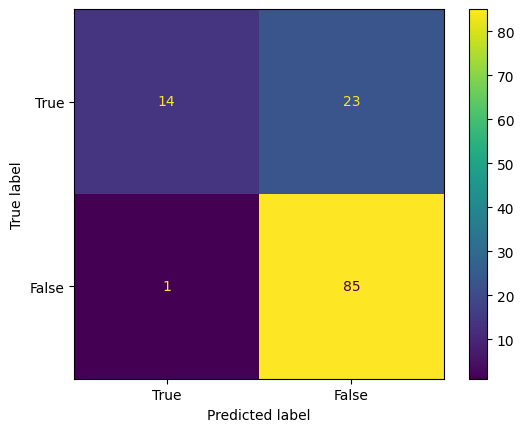

In [ ]:
print("Naive Bayes:\n",model_visual.plot())

In [ ]:
knn = confusion_matrix(test_target, predicted)
model_visual = ConfusionMatrixDisplay(knn, display_labels=['True', 'False'])

KNN:


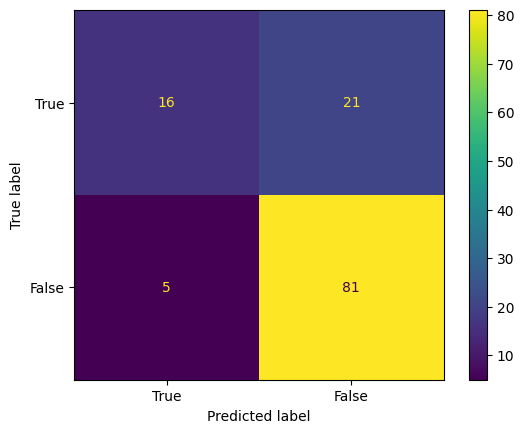

In [ ]:
print("KNN:\n",model_visual.plot())

In [ ]:
cm = confusion_matrix(test_target, predictions)

model_visual = ConfusionMatrixDisplay(cm, display_labels=['True', 'False'])

C4.5:


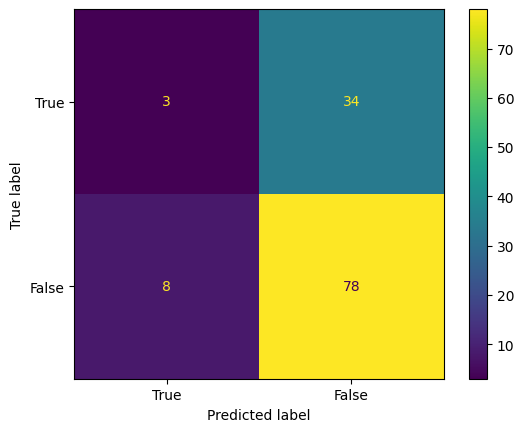

In [ ]:
print("C4.5:\n",model_visual.plot())

Berdasarkan hasil evaluasi, didapatkan bahwa:

1. Algoritma untuk mencari pola pemberian pinjaman adalah C4.5, karena memiliki nilai presisi dan recall yang cukup baik, sehingga dapat menghasilkan pola yang akurat dan bisa digunakan untuk membuat keputusan dalam pemberian pinjaman.

2. Algoritma untuk memprediksi calon penerima pinjaman adalah Naive Bayes, karena memiliki akurasi, presisi, recall, dan F1-score yang cukup tinggi, sehingga dapat menghasilkan prediksi yang akurat dan bisa digunakan untuk menentukan calon penerima pinjaman.

3. Algoritma untuk mengklasifikasi penerima pinjaman adalah KNN, karena memiliki akurasi, presisi, recall, dan F1-score yang cukup baik, sehingga dapat mengklasifikasikan penerima pinjaman dengan akurat dan efektif.

Namun pada evaluasi yang telah dilakukan terhadap tiga algoritma yaitu Naive Bayes, KNN, dan C4.5, terdapat perbedaan kinerja yang signifikan antara ketiganya. Dari nilai evaluasi tersebut, dapat disimpulkan bahwa algoritma yang paling baik kinerjanya untuk tujuan pada business understanding adalah Naive Bayes, karena memiliki akurasi dan precision yang cukup tinggi, serta nilai F1-score yang cukup seimbang. Algoritma ini cocok untuk mencari pola pemberian pinjaman dan memprediksi calon penerima pinjaman.

Dan untuk mengklasifikasikan penerima pinjaman, bisa menggunakan KNN, karena memiliki nilai recall yang cukup tinggi. KNN juga dapat digunakan sebagai metode backup atau alternatif jika Naive Bayes tidak memberikan hasil yang memuaskan dalam mengklasifikasikan penerima pinjaman. Sedangkan, C4.5 yang memiliki kinerja paling rendah dari ketiga algoritma tersebut, sehingga sebaiknya algoritma ini tidak digunakan.

## Deployment

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# data.to_csv('/content/drive/MyDrive/PA_Kel3_DatMin/Data-Pinjaman-Nasabah-Deployment.csv', index=False)
data.to_csv('/content/drive/MyDrive/PA_Kel3_DatMin/data_pinjaman_nasabah.csv', index=False)

In [ ]:
batas = "-"*180
print(batas)